In [ ]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [2]:
tf.set_random_seed(777)  # reproducibility

중요한 역할은 아닌데 같은 랜덤으로 나오도록하는거? 777은 아무숫자나 해도 욈

In [3]:
mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# parameters
learning_rate = 0.001
training_epochs = 100 #전체 데이터를 50번 학습하겠다
batch_size = 128

In [5]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

784개의 점들이 있고 10개의 나오는 결과가 있어 
각 점마다 10개씩의 선이 방출
7840개의 선이 연결선이 생긴다 
7이란 숫자가 적힌 그림이 있으면 흰색부분은 쓰지 않는 부위로 판단 0, 1이면 칠해진 영역 이렇게 점차 오차를 줄여나가는 것 

b, 고정해주는 역할??? 처음애는 랜더으로 아무값을 눻고  가설을 새운다 x가 들어와서 w선의 갯수 둘을 곱하고 b를 더해라 
에러는 어떻게 정의할까 내가 세운 가설이랑 레이블을 뺴라  옵티마이즈에게 오차좀 줄려죠 부ㅌㄱ

In [6]:
# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(X, W) + b

# define cost/loss & optimizer
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [7]:
# initialize
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [10]:
vc = []

In [11]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    vc.append(avg_cost)
    
print('Learning Finished!')

Epoch: 0001 cost = 14.308401650
Epoch: 0002 cost = 9.026778536
Epoch: 0003 cost = 6.412436645
Epoch: 0004 cost = 4.862800869
Epoch: 0005 cost = 3.840647854
Epoch: 0006 cost = 3.115457276
Epoch: 0007 cost = 2.567167001
Epoch: 0008 cost = 2.144114804
Epoch: 0009 cost = 1.805606233
Epoch: 0010 cost = 1.531944441
Epoch: 0011 cost = 1.305222320
Epoch: 0012 cost = 1.116181322
Epoch: 0013 cost = 0.956514186
Epoch: 0014 cost = 0.818951411
Epoch: 0015 cost = 0.701222375
Epoch: 0016 cost = 0.601362520
Epoch: 0017 cost = 0.514871872
Epoch: 0018 cost = 0.441104051
Epoch: 0019 cost = 0.377390171
Epoch: 0020 cost = 0.322839895
Epoch: 0021 cost = 0.276691091
Epoch: 0022 cost = 0.237337386
Epoch: 0023 cost = 0.204031259
Epoch: 0024 cost = 0.175245805
Epoch: 0025 cost = 0.151707734
Epoch: 0026 cost = 0.131606124
Epoch: 0027 cost = 0.114884792
Epoch: 0028 cost = 0.100642784
Epoch: 0029 cost = 0.089358514
Epoch: 0030 cost = 0.079655104
Epoch: 0031 cost = 0.071808274
Epoch: 0032 cost = 0.065404788
Epoch: 

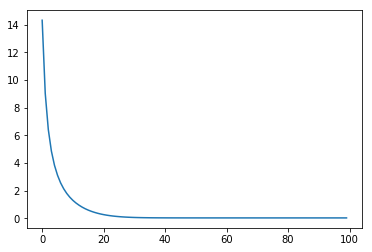

In [13]:
plt.plot(vc)
plt.show()

In [ ]:
################################
# 정확도 확인하기
# Test model and check accuracy
pred = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
print (pred.dtype)
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))
print('Accuracy (test):', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))